In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#Read dataset to pandas dataframe
dataset = pd.read_excel('/content/drive/MyDrive/MTP_FINAL/Dataset-3.xlsx', sheet_name='IOCCG_simulated')

In [ ]:
#breaking down the dataset into x feature and y target
dataset_y=dataset['Chlorophyll']
dataset_x=dataset.drop(['Chlorophyll'],axis=1)

In [ ]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(dataset_x)

In [ ]:
#splitting the dataset
y = dataset_y
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=42)

                                **Linear** **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(X_train, y_train)
r_sq = model_lr.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_lr.intercept_}")
print(f"coefficients: {model_lr.coef_}")
y_predicted_lr = model_lr.predict(X_test)

coefficient of determination: 0.9749539065766213
intercept: 1.5883271177577312
coefficients: [-8.59046028e+00 -7.75261121e+00  5.95970176e+01 -3.33695426e+01
 -6.17266453e+01  4.57736050e+01  5.60363250e+00  3.39063803e+01
  3.00125383e+01 -1.27735524e+02  1.12346945e+02 -8.60618886e+01
 -1.49565015e+02  2.94993833e+02 -2.45089619e+02  2.25485689e+02
  1.74522626e+02 -4.08572423e+02  1.24740701e+02  2.01254435e+02
 -2.87027083e+02 -7.76442224e+01  9.95227873e+01 -7.66208836e+01
 -3.22741727e+01  1.34879716e+02 -3.38595110e+01 -5.98797474e+01
 -2.78322306e+02  4.11149257e+02  5.78222217e+02 -3.80318138e+03
  7.68783394e+03  5.69377152e+03 -1.20756686e+04 -1.67448789e+04
 -1.08417096e+04  4.49088971e+04  2.61540167e+04 -5.89472347e+04
  1.74300045e+04]


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_square = model_lr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_lr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_lr)
print(mape)

1.8839000944012931
0.9596141946291962
1.118532839365514
2.2682886873549166


                                 **Gradient** **Booster** **Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor().fit(X_train, y_train)
y_predicted_gb = model_gb.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_gb))
print(rms)
r_square = model_gb.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_gb)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_gb)
print(mape)

2.4219080152888774
0.9332535301596381
1.2665673623540163
0.5285664761158505


In [ ]:
#Hyperparameter tuning
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 2000,
 'random_state': 1,
 'subsample': 0.5}

In [ ]:
GBR2 = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.01,subsample=0.5,max_depth=4,random_state=1)
model_gbhp = GBR2.fit(X_train, y_train)
y_predicted_gbhp = model_gbhp.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_gbhp))
print(rms)
r_square = model_gbhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_gbhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_gbhp)
print(mape)

2.1424756800142326
0.9477670188151436
1.1974530368579857
0.37943372896744865


                                  **PLS** **Regression**

In [ ]:
from sklearn.cross_decomposition import PLSRegression
model_plsr = PLSRegression(n_components=41, scale=True)
model_plsr.fit(X_train, y_train)
y_predicted_plsr = model_plsr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_plsr))
print(rms)
r_square = model_gb.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_plsr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_plsr)
print(mape)

1.8839000944020214
0.9332535301596381
1.1185328393661806
2.2682886873631456


In [ ]:
#Hyperparameter Tuning
r_square = []
rms = [] 
mae = []
mape = []#to store rmse values for different n_components
for n_comp in range(1, 41):
  model_plsrhp = PLSRegression(n_components=n_comp, scale=True)
  model_plsrhp.fit(X_train, y_train)
  y_predicted_plsrhp = model_plsrhp.predict(X_test)
  rms_val = sqrt(mean_squared_error(y_test,y_predicted_plsrhp)) #calculate rmse
  rms.append(rms_val) #store rmse values
  r2 = model_plsrhp.score(X_test,y_test)
  r_square.append(r2) #store r2 values
  mae_1 = mean_absolute_error(y_test,y_predicted_gbhp)
  mae.append(mae_1)
  mape_1 = mean_absolute_percentage_error(y_test, y_predicted_gbhp)
  mape.append(mape_1)

In [ ]:
print(min(rms))
print(max(r_square))
print(min(mae))
print(min(mape))

1.723763613541174
0.9661881891841488
1.1974530368579857
0.37943372896744865


                                    **Random** **Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators = 500)
model_rfr.fit(X_train,y_train)
y_predicted_rfr = model_rfr.predict(X_test) 

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rfr))
print(rms)
r_square = model_gb.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rfr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rfr)
print(mape)

2.2903666935242777
0.9332535301596381
1.227072266666667
0.28563880000000014


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True],'max_depth': [80, 90, 100, 110],'max_features': [2, 3],'min_samples_leaf': [3, 4, 5],'min_samples_split': [8, 10, 12],'n_estimators': [100, 200, 300, 1000]}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_rfrhp = grid_search.best_estimator_
model_rfrhp.fit(X_train,y_train)
y_predicted_rfrhp = model_rfrhp.predict(X_test) 

Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rfrhp))
print(rms)
r_square = model_rfrhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rfrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rfrhp)
print(mape)

2.613370572287376
0.9222831830119085
1.4160747937322629
0.41305898079299247


                                   **KNN**

In [ ]:
from sklearn import neighbors
r_square = []
rms = [] 
mae = []
mape = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    y_predicted_knn = model_knn.predict(X_test) #make prediction on test set
    rms_val = sqrt(mean_squared_error(y_test,y_predicted_knn)) #calculate rmse
    rms.append(rms_val) #store rmse values
    r2 = model_knn.score(X_test,y_test)
    r_square.append(r2) #store r2 values
    mae_1 = mean_absolute_error(y_test,y_predicted_knn)
    mae.append(mae_1)
    mape_1 = mean_absolute_percentage_error(y_test, y_predicted_knn)
    mape.append(mape_1)

In [ ]:
print(min(rms))
print(max(r_square))
print(min(mae))
print(min(mape))

2.3606464990195657
0.9365874924475097
1.2734400000000001
0.3011058201058201


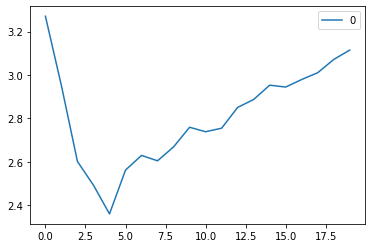

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rms) #elbow curve 
curve.plot()

                                      **SVR**

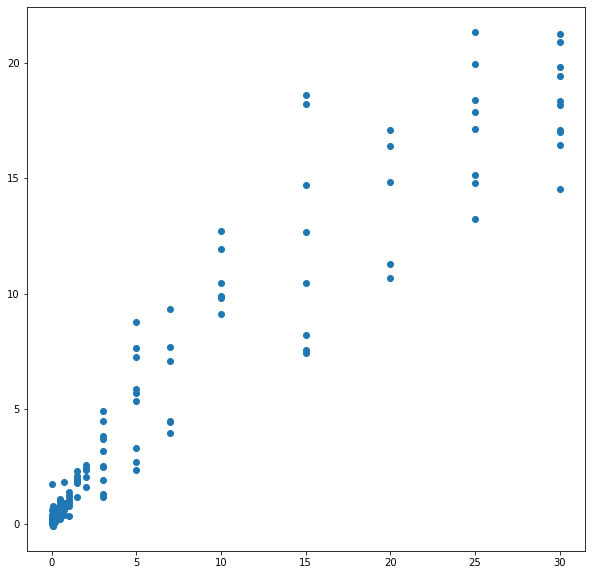

In [ ]:
from sklearn.svm import SVR
model_svr = SVR(kernel = 'rbf')
model_svr.fit(X_train, y_train)
y_predicted_svr = model_svr.predict(X_test)
plt.figure(figsize = (10,10))
plt.scatter(y_test,y_predicted_svr)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_svr))
print(rms)
r_square = model_svr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_svr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_svr)
print(mape)

4.065866824707983
0.8118867827509079
2.071686640465434
1.3436885745203424


In [ ]:
#Hyperparameter Tuning
c_range = np.logspace(-2, 2, 5)
gamma_range = np.logspace(-2, 2, 5)
parameters = {'kernel': ['rbf'], 'C': c_range,'gamma': gamma_range,'epsilon':[1,0.1,0.01,00.001]}
svr = SVR()
grid_search = GridSearchCV(svr, parameters)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'C': 100.0, 'epsilon': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}


In [ ]:
model_svrhp = grid_search.best_estimator_
model_svrhp.fit(X_train,y_train)
y_predicted_svrhp = model_svrhp.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_svrhp))
print(rms)
r_square = model_svrhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_svrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_svrhp)
print(mape)

1.5290658239136643
0.9733948706189857
0.8135979839023273
0.5906008118867224


                              **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model_abr = AdaBoostRegressor().fit(X_train, y_train)
y_predicted_abr = model_abr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_abr))
print(rms)
r_square = model_abr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_abr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_abr)
print(mape)

3.158988250759704
0.8864442752420144
2.5793254939309365
12.577578343411732


In [ ]:
#Hyperparametrer Tuning
param_grid = {'n_estimators':list(range(0, 1000, 100)), 'learning_rate':[100,10,1,0.1, 0.01, 0.001]}
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=1, cv=5)

In [ ]:
#fit the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_adbhp = grid_search.best_estimator_
model_adbhp.fit(X_train,y_train)
y_predicted_abrhp = model_adbhp.predict(X_test) 

{'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_abrhp))
print(rms)
r_square = model_adbhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_abrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_abrhp)
print(mape)

2.6954444080138753
0.917325082430773
1.7893464444385767
5.497130577130315


                         **Ridge & Lasso** **Regression**

In [ ]:
#Ridge Regression, using Grid Search CV to find the best parameter for alpha
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regression.best_params_)

{'alpha': 1e-08}


In [ ]:
model_rr = Ridge(alpha=1e-08).fit(X_train,y_train)
y_predicted_rr = model_rr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rr))
print(rms)
r_square = model_rr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rr)
print(mape)

1.7767249267599612
0.9640785877225531
1.090392147853258
2.393974209513725


In [ ]:
#Lasso Regression, using Grid Search CV to find the best parameter for alpha
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regression.best_params_)

{'alpha': 0.001}


In [ ]:
model_lr = Lasso(alpha=0.001).fit(X_train,y_train)
y_predicted_lr = model_lr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_square = model_lr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_lr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_lr)
print(mape)

2.661610798671261
0.9193875515971917
1.8666291450529184
5.193943924539678


In [ ]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
input_unit = 41
hidden_units2 = 10
learning_rate = 0.008
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(input_unit, kernel_initializer='normal', activation='relu'),
    Dropout(0.4),
    # Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=150, 
    batch_size=64,
    validation_split=0.2)

Epoch 1/150
5/5 [==============================] - 1s 40ms/step - loss: 2.3710 - mean_squared_logarithmic_error: 2.3583 - val_loss: 1.6937 - val_mean_squared_logarithmic_error: 1.5783
Epoch 2/150
5/5 [==============================] - 0s 13ms/step - loss: 1.4442 - mean_squared_logarithmic_error: 1.3327 - val_loss: 1.0178 - val_mean_squared_logarithmic_error: 1.0086
Epoch 3/150
5/5 [==============================] - 0s 7ms/step - loss: 0.9328 - mean_squared_logarithmic_error: 0.8940 - val_loss: 0.7480 - val_mean_squared_logarithmic_error: 0.7855
Epoch 4/150
5/5 [==============================] - 0s 7ms/step - loss: 0.7402 - mean_squared_logarithmic_error: 0.7215 - val_loss: 0.5878 - val_mean_squared_logarithmic_error: 0.6346
Epoch 5/150
5/5 [==============================] - 0s 10ms/step - loss: 0.5794 - mean_squared_logarithmic_error: 0.5557 - val_loss: 0.4314 - val_mean_squared_logarithmic_error: 0.4675
Epoch 6/150
5/5 [==============================] - 0s 10ms/step - loss: 0.4384 - m

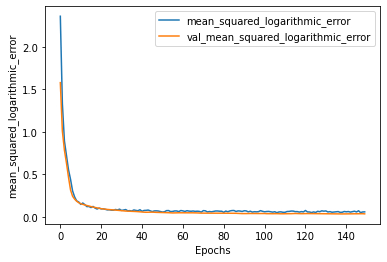

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
Y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Y_pred)
rmse = math.sqrt(mse)
print(rmse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Y_pred)
print(r2)
mae = mean_absolute_error(y_test,Y_pred)
print(mae)
mape = mean_absolute_percentage_error(y_test, Y_pred)
print(mape)

3.3254076187686166
0.8741646135769033
1.6238821985205014
0.5497430839199868
